In [1]:
cd ..

/home/pauline/Dokumente/Delab_Projekt/delab


In [2]:
from util.sql_switch import get_query_native

tweet_text = get_query_native(
    "SELECT ta.id as author_id, conversation_id, text, screen_name , is_climate_author, climate_author_type FROM delab_tweet t, delab_tweetauthor ta WHERE t.author_id=ta.twitter_id")
tweet_text = tweet_text.loc[tweet_text['is_climate_author']== True]
tweet_text.head()

using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,author_id,conversation_id,text,screen_name,is_climate_author,climate_author_type
172,425,1570922061413101569,"@ClimateHuman Wow. Also noted, the deliberate omission of your title to downplay your expertise. Just wow.",KHayhoe,True,scientist
389,425,1566919598456307714,@ClimateHuman Congratulations to Sharon! That’s a great area with a lot of climate action going on. I hope you find many kindred spirits there.,KHayhoe,True,scientist
598,451,1618561690613972992,Mehr Infos in unserer Pressemitteilung:\n\nhttps://t.co/eZ7kPG3mml,AufstandLastGen,True,non-governmental organisation
668,425,1528112158302687233,@MichaelEMann @RichardMR64 @ClimateHuman @ClimateComms The goal of COP26 was to finalize article 6 of the Paris agreement. Was that goal sufficient? No. But did it accomplish its stated goal? Yes.\n\nMaking up a goal such as “this conference will fix climate change”and using that goal as a measure of success or failure isn’t accurate.,KHayhoe,True,scientist
669,425,1528112158302687233,"@MichaelEMann @RichardMR64 @ClimateHuman @ClimateComms The failure is not with the outcome but with the goal itself. \n\nIt also reinforces the idea that only countries are responsible for solutions. Cities, companies, and organizations all have key roles to play as well.",KHayhoe,True,scientist


In [3]:
authors = tweet_text.groupby('climate_author_type').count()
authors

,author_id,conversation_id,text,screen_name,is_climate_author
climate_author_type,,,,,
activist,4310,4310,4310,4310,4310
journalist,3145,3145,3145,3145,3145
non-governmental organisation,4000,4000,4000,4000,4000
organisation,2420,2420,2420,2420,2420
politician,2268,2268,2268,2268,2268
scientist,7294,7294,7294,7294,7294


In [4]:
tweet_links = tweet_text.loc[tweet_text['text'].str.contains("https://")]
#tweet_links.head()

In [5]:
tweet_mentions = tweet_text.loc[tweet_text['text'].str.contains("@")]
#tweet_mentions.head()

In [6]:
tweet_len = tweet_text
tweet_len['text_length'] = tweet_len['text'].str.len()
#tweet_len.head()

In [7]:
author_mention = tweet_mentions.groupby('climate_author_type').count() /authors
author_mention

,author_id,conversation_id,text,screen_name,is_climate_author
climate_author_type,,,,,
activist,0.631787,0.631787,0.631787,0.631787,0.631787
journalist,0.535771,0.535771,0.535771,0.535771,0.535771
non-governmental organisation,0.392500,0.392500,0.392500,0.392500,0.392500
organisation,0.614876,0.614876,0.614876,0.614876,0.614876
politician,0.418430,0.418430,0.418430,0.418430,0.418430
scientist,0.626679,0.626679,0.626679,0.626679,0.626679


In [15]:
authors_links = tweet_links.groupby('climate_author_type').count()/authors
authors_links

,author_id,conversation_id,text,screen_name,is_climate_author
climate_author_type,,,,,
activist,0.359397,0.359397,0.359397,0.359397,0.359397
journalist,0.399046,0.399046,0.399046,0.399046,0.399046
non-governmental organisation,0.620000,0.620000,0.620000,0.620000,0.620000
organisation,0.613223,0.613223,0.613223,0.613223,0.613223
politician,0.515873,0.515873,0.515873,0.515873,0.515873
scientist,0.519194,0.519194,0.519194,0.519194,0.519194


In [9]:
authors_tweet_len = tweet_len.groupby('climate_author_type').mean()
authors_tweet_len = authors_tweet_len.drop(columns=['author_id', 'is_climate_author', 'conversation_id'])
authors_tweet_len

,text_length
climate_author_type,
activist,193.712993
journalist,199.311924
non-governmental organisation,219.352750
organisation,250.172727
politician,220.407407
scientist,203.575404


In [10]:
authors_tweet_len = tweet_len.groupby('climate_author_type').median()
authors_tweet_len = authors_tweet_len.drop(columns=['author_id', 'is_climate_author', 'conversation_id'])
authors_tweet_len

,text_length
climate_author_type,
activist,220.0
journalist,227.0
non-governmental organisation,248.0
organisation,268.0
politician,258.0
scientist,232.0


In [ ]:
import matplotlib.pyplot as plt

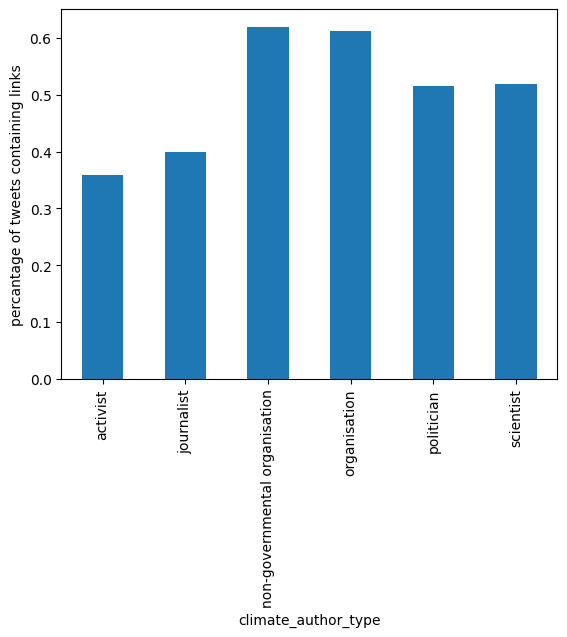

In [21]:
fig = authors_links['author_id'].plot(kind='bar')
fig.set_ylabel("percantage of tweets containing links");

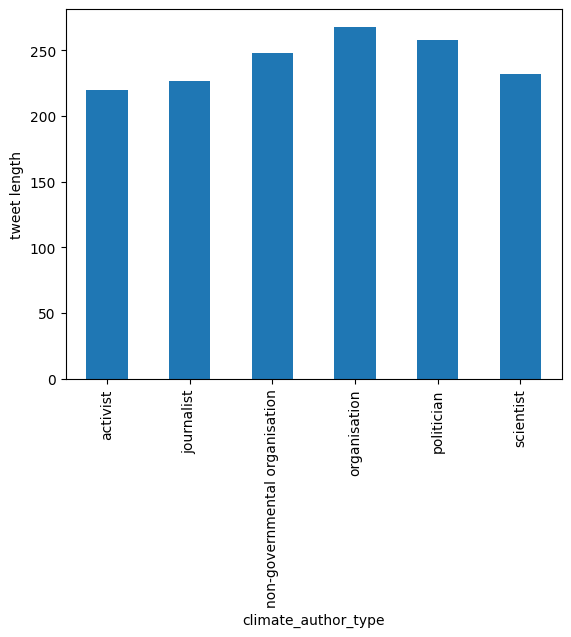

In [23]:
fig = authors_tweet_len['text_length'].plot(kind='bar')
fig.set_ylabel("tweet length");